# EDA Hospital F5

#### Cargar datos

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("data/stroke_dataset.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


Se tiene 11 columnas y 4981 filas.

Descripción de las columnas

- **gender**: género del paciente (Male / Female).
- **age**: edad.
- **hypertension**: hypertension (0 / 1).
- **heart_disease**: si el paciente presenta alguna enfermedad del corazón (0 / 1).
- **ever_married**: si ha estado casado (Yes / No).
- **work_type**: Tipo de trabajo.
- **residence_type**: Tipo de residencia.
- **avg_glucose_level**: Nivel promedio de glucosa.
- **bmi**: bmi (Body mass index	)
- **smoking_status**: estados de fumador.
- **stroke**: target.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


- No falta ningún valor.
- La edad se cambiara a tipo de dato *int*.
- Las columnas *object* se pasaran a category.

#### Limpieza

Cambiar tipo de datos

In [54]:
def change_datatype(df: pd.DataFrame):
	df['age'] = df['age'].astype("int")
	df['ever_married'] = df['ever_married'].astype("category")
	cols = df.select_dtypes(include="object").columns
	cols = list(cols) + ['hypertension', 'heart_disease']
	df[cols] = df[cols].astype("category")

change_datatype(df)
df.dtypes

gender               category
age                     int64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

In [55]:
# Comprobar duplicados
df.duplicated().sum()

np.int64(0)

In [56]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [57]:
df.describe(include="category")

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
count,4981,4981,4981,4981,4981,4981,4981
unique,2,2,2,2,4,2,4
top,Female,0,0,Yes,Private,Urban,never smoked
freq,2907,4502,4706,3280,2860,2532,1838


In [58]:
df.work_type.unique()
value = df.work_type.value_counts()
print(type(value))
print(value)

<class 'pandas.core.series.Series'>
work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: count, dtype: int64


#### Análisis de variables

In [ ]:
sns.countplot(data=df, x='stroke')

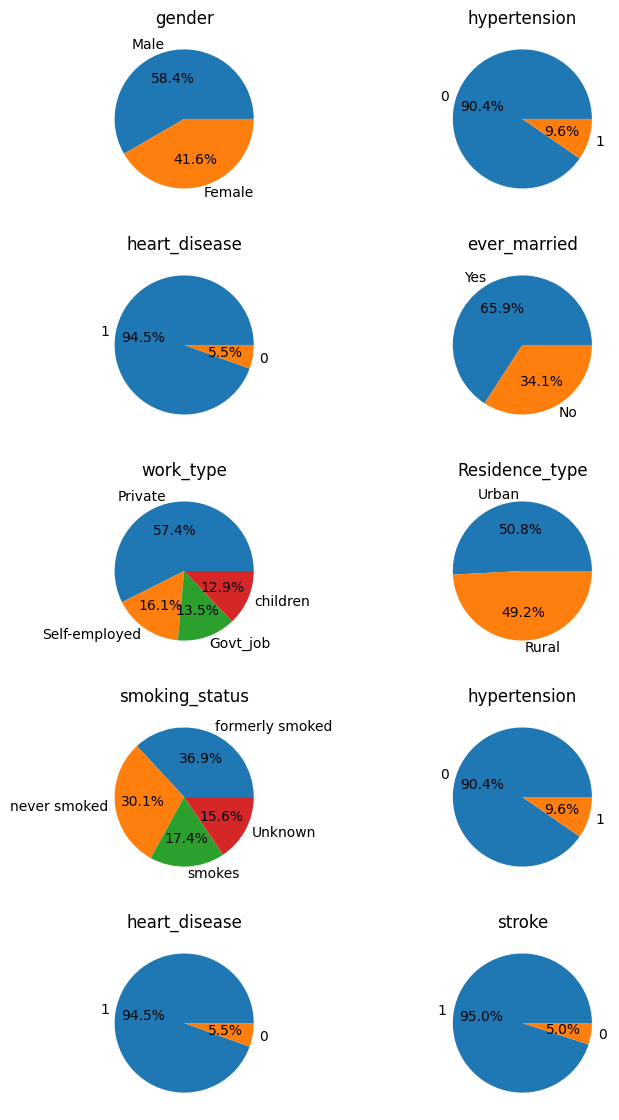

In [59]:
col_cat = df.select_dtypes(include="category").columns
col_bin = ['hypertension', 'heart_disease', 'stroke']
fig, ax = plt.subplots(5, 2, figsize=(8, 14))
fig.subplots_adjust(hspace=0.3)
ax = ax.flatten()
for i, col in enumerate(list(col_cat) + col_bin):
	ax[i].pie(df[col].value_counts(), labels=df[col].unique(), autopct='%1.1f%%')
	ax[i].set_title(col)

- Más del 57% de pacientes trabajan de forma privada, además que *children* esta incluida en esa feature (work_type)
- El 94.5% de pacientes presentan alguna enfermedad cardiaca.
- La variable predictiva (**stroke**) esta desvalanceada, tiene un 95% de casos positivos y solo un 5% de negativos.

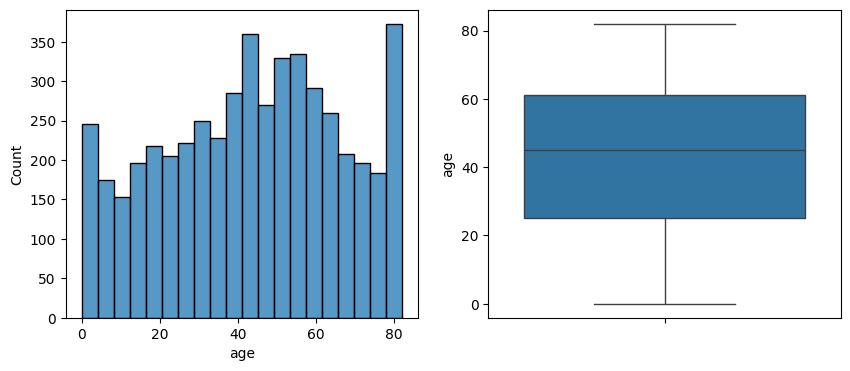

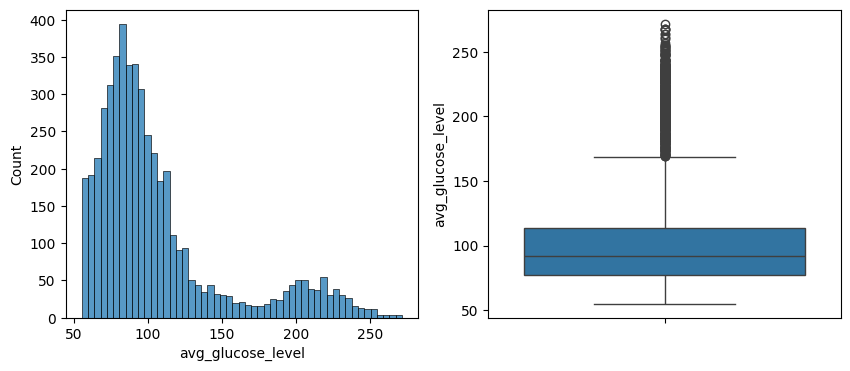

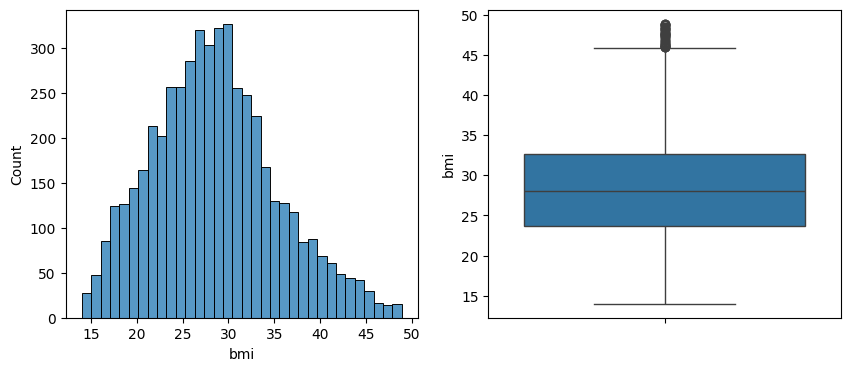

In [60]:
num_cols = ['age', 'avg_glucose_level', 'bmi']
for i, col in enumerate(num_cols):
	fig, ax = plt.subplots(1, 2, figsize=(10, 4))
	sns.histplot(data=df, x=col, ax=ax[0])
	sns.boxplot(data=df, y=col, ax=ax[1])
	plt.show()

In [61]:
df[num_cols].describe()

,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.408552,105.943562,28.498173
std,22.683945,45.075373,6.790464
min,0.000000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


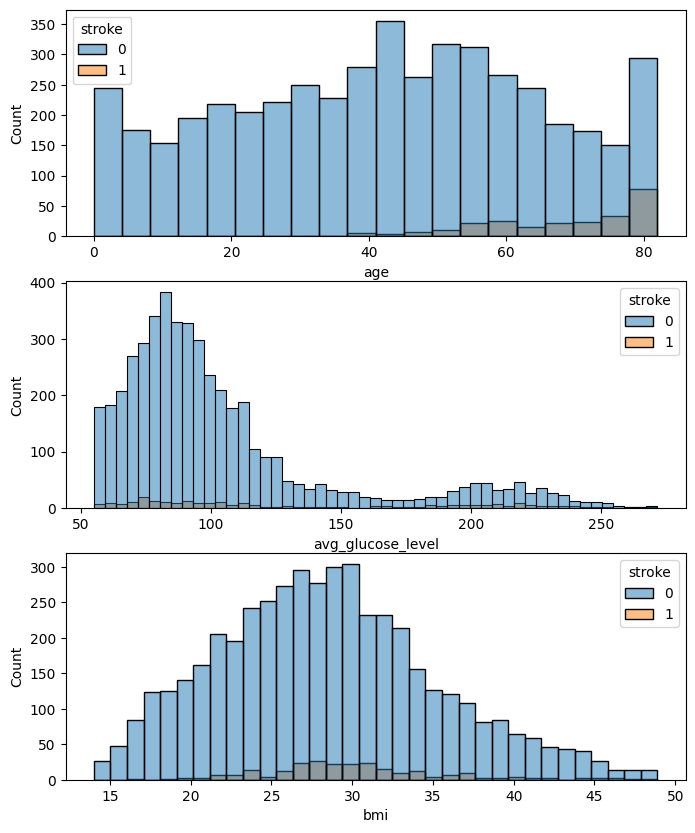

In [62]:
num_cols = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(3, 1, figsize=(8, 10))
for i, col in enumerate(num_cols):
	sns.histplot(data=df, x=col, hue='stroke', ax=ax[i])

- Los pacientes mayores que 35 dieron positivo.

<Axes: >

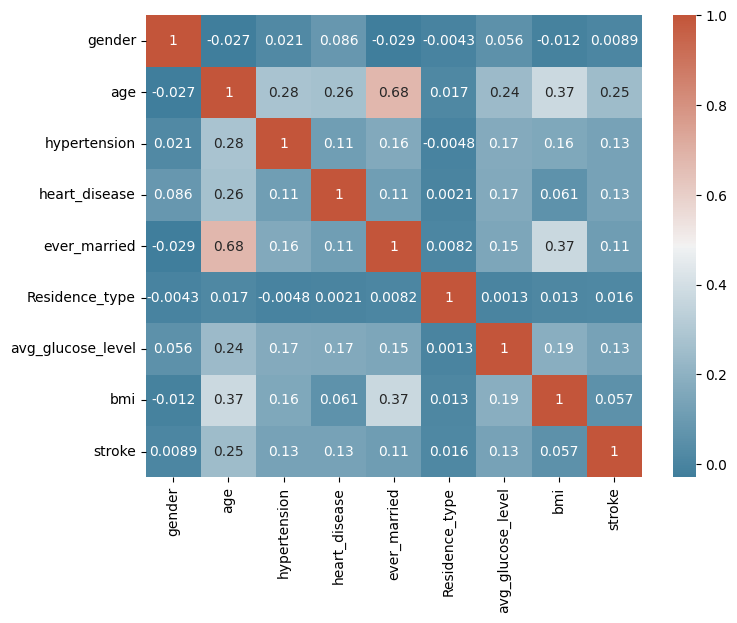

In [77]:
corr_data = df.corr()
fig, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data=corr_data, cmap=cmap, annot=True, ax=ax)

In [64]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df, title="Profiling Report")
# profile.to_notebook_iframe()

## Tranformar datos

In [65]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [66]:
cols = df.select_dtypes('category').columns
for c in cols:

	print(df[c].unique())

['Male', 'Female']
Categories (2, object): ['Female', 'Male']
[0, 1]
Categories (2, int64): [0, 1]
[1, 0]
Categories (2, int64): [0, 1]
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
['Private', 'Self-employed', 'Govt_job', 'children']
Categories (4, object): ['Govt_job', 'Private', 'Self-employed', 'children']
['Urban', 'Rural']
Categories (2, object): ['Rural', 'Urban']
['formerly smoked', 'never smoked', 'smokes', 'Unknown']
Categories (4, object): ['Unknown', 'formerly smoked', 'never smoked', 'smokes']


In [67]:
from sklearn.preprocessing import LabelEncoder

def code_data(df: pd.DataFrame):
	# Lista de features categóricas binarias
	cat_bin = [c for c in df.select_dtypes('category').columns if len(df[c].unique()) == 2]

	# Lista de features categóricas
	cat_no_bin = [c for c in df.select_dtypes('category').columns if len(df[c].unique()) > 2]
	
	df_cat = pd.get_dummies(df[cat_no_bin], dtype="int")
	df.drop(columns=cat_no_bin, inplace=True)

	le = LabelEncoder()

	for c in cat_bin:
		df[c] = le.fit_transform(df[c])
	return pd.concat([df, df_cat], axis=1)

df_code = code_data(df)
df_code


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
1,1,80,0,1,1,0,105.92,32.5,1,0,1,0,0,0,0,1,0
2,0,49,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,0,1
3,0,79,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
4,1,81,0,0,1,1,186.21,29.0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41,0,0,0,0,70.15,29.8,0,0,1,0,0,0,1,0,0
4977,1,40,0,0,1,1,191.15,31.1,0,0,1,0,0,0,0,0,1
4978,0,45,1,0,1,0,95.02,31.8,0,1,0,0,0,0,0,0,1
4979,1,40,0,0,1,0,83.94,30.0,0,0,1,0,0,0,0,0,1


In [69]:
df_code.to_csv('data/dataset_code.csv')